# DSCI 100 Group Project Report

### Introduction

Can we predict the win rate of a player given their various statistics? We aim to investigate the factors that influence the win rate in tennis games. We are interested in understanding the relationship between a player's stats and the likelihood of winning a game. By gaining insights into how these factors relate to the probability of winning, we can make more informed and predictive decisions regarding future tennis matches.

To conduct our research, we chose to use the `atp2017-2019.csv` data set provided on the group project proposal page on Canvas. This data set contains 6866 observations and 49 variables. Each observation represents a match played in 2017-2019 between top 500 ATP ranked players. The variables contain information both about the match and the individual player stats, with 11 being unique variables, and the rest being various player stats that are separate for the winner and the loser.

### Methods & Results

The following libraries are loaded to provide the functions that are used to operate on the data:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("ggplot2")
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

The data is read using `read_csv` and displayed below.

In [2]:
tennis_data <- read_csv("atp2017-2019.csv") |>
    select(-...1) |>
    mutate(surface = as_factor(surface))
tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,NA,⋯,54,34,20,14,10,15,9,3590,16,1977
2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,NA,⋯,52,36,7,10,10,13,16,1977,239,200
2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,NA,⋯,27,15,6,8,1,5,9,3590,40,1050
2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,PR,⋯,60,38,9,11,4,6,239,200,31,1298
2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,NA,⋯,56,46,19,15,2,4,16,1977,18,1855
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6,NA,⋯,54,42,22,15,11,15,6,3650,8,2975
2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NA,NA,⋯,53,33,21,14,6,11,7,3775,18,2235
2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,NA,⋯,54,30,12,12,5,11,15,2320,76,667


The stats of the winners of each match are selected and renamed, then assigned to an object named *`tennis_winner`*. The number of wins is also obtained using `group_by()` and `summarize()` and assigned to *`tennis_wins`*.

In [3]:
tennis_winner <- tennis_data |>
    select(winner_name, winner_age, winner_ht, winner_hand, minutes:w_bpFaced) |>
    rename("name" = winner_name, "age" = winner_age, "ace" = w_ace, "df" = w_df, "sv_pts" = w_svpt, "first_sv_in" = w_1stIn, "first_sv_won" = w_1stWon,
           "second_sv_won" = w_2ndWon, "sv_gms" = w_SvGms, "bp_saved" = w_bpSaved, "bp_faced" = w_bpFaced, "winner_height" = winner_ht)

tennis_wins <- tennis_winner |>
    group_by(name) |>
    summarize(win_count = n())

tennis_win_names <- tennis_winner |>
    pull(name)


In [4]:
numeric_columns <- c("age", "winner_height", "first_sv_in", "ace", "bp_faced")

tennis_winner_data <- tennis_winner |>
  mutate(across(all_of(numeric_columns), ~replace_na(., mean(., na.rm = TRUE))))

tennis_winner_data

name,age,winner_height,winner_hand,minutes,ace,df,sv_pts,first_sv_in,first_sv_won,second_sv_won,sv_gms,bp_saved,bp_faced
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kei Nishikori,29.00479,178.0000,R,124,3,3,77,44,31,17,13,3,6
Daniil Medvedev,22.88569,186.5343,R,82,10,1,52,33,28,14,10,0,1
Kei Nishikori,29.00479,178.0000,R,66,2,2,47,33,26,9,8,2,2
Jo Wilfried Tsonga,33.70568,188.0000,R,106,12,2,68,43,34,15,11,4,5
Daniil Medvedev,22.88569,186.5343,R,129,12,3,105,68,48,25,16,8,8
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Grigor Dimitrov,26.49692,188,R,150,5,6,103,67,47,18,16,7,10
David Goffin,26.95414,163,R,119,12,0,74,48,40,17,14,0,0
Jo Wilfried Tsonga,32.59411,188,R,106,12,2,64,33,31,19,12,0,0


The stats of the losers are also selected and renamed, but are then filtered to only contain those that have won at least a single match. The number of losses is obtained using the same operations.

In [5]:
tennis_loser <- tennis_data |>
    select(loser_name, loser_age, minutes, loser_ht, loser_hand, l_ace:l_bpFaced) |>
    rename("name" = loser_name, "age" = loser_age, "ace" = l_ace, "df" = l_df, "sv_pts" = l_svpt, "first_sv_in" = l_1stIn, "first_sv_won" = l_1stWon,
           "second_sv_won" = l_2ndWon, "sv_gms" = l_SvGms, "bp_saved" = l_bpSaved, "bp_faced" = l_bpFaced, "loser_height" = loser_ht) |>
    filter(name %in% tennis_win_names)

tennis_losses <- tennis_loser |>
    group_by(name) |>
    summarize(loss_count = n())

tennis_loss_names <- tennis_loser |>
    pull(name)

In [6]:
numeric_columns <- c("age", "loser_height", "first_sv_in", "ace", "bp_faced")

tennis_loser_data <- tennis_loser |>
  mutate(across(all_of(numeric_columns), ~replace_na(., mean(., na.rm = TRUE))))

tennis_loser_data

name,age,minutes,loser_height,loser_hand,ace,df,sv_pts,first_sv_in,first_sv_won,second_sv_won,sv_gms,bp_saved,bp_faced
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Daniil Medvedev,22.88569,124,186.1851,R,8,6,100,54,34,20,14,10,15
Jo Wilfried Tsonga,33.70568,82,188.0000,R,17,2,77,52,36,7,10,10,13
Jeremy Chardy,31.88227,66,188.0000,R,10,3,46,27,15,6,8,1,5
Alex De Minaur,19.86858,106,186.1851,R,1,2,81,60,38,9,11,4,6
Milos Raonic,28.01095,129,196.0000,R,29,5,94,56,46,19,15,2,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
David Goffin,26.93498,150,163,R,10,5,107,54,42,22,15,11,15
Lucas Pouille,23.73990,119,185,R,6,2,95,53,33,21,14,6,11
Steve Darcis,33.68925,106,178,R,1,2,81,54,30,12,12,5,11


`filter()` is used here again, this time to filter to only contain those that have lost at least a single match. The number of wins and losses are put into a single table using `bind_cols()`.  This creates a better representation of players, as those that have only won or only lost matches over two years are likely outliers who haven't played many games.

In [7]:
win_loss <- tennis_wins |>
    filter(name %in% tennis_loss_names) |>
    bind_cols(select(tennis_losses, loss_count))
win_loss

name,win_count,loss_count
<chr>,<int>,<int>
Adam Pavlasek,3,5
Adrian Mannarino,81,77
Adrian Menendez Maceiras,4,11
Akira Santillan,2,4
Albert Ramos,72,81
⋮,⋮,⋮
Yuichi Sugita,29,41
Ze Zhang,2,8
Zhe Li,1,6


Finally, all the data gathered above is put together and assigned to *`tennis_stats`*. This data frame contains all players with at least a single win and loss, including their average stats, number of games played, and numbers of wins and losses.

In [8]:
tennis_stats <- bind_rows(tennis_winner, tennis_loser) |>
    filter(name %in% tennis_loss_names) |>
    group_by(name) |>
    summarize(
        age = mean(age, na.rm = TRUE),
        winner_height = mean(winner_height, na.rm = TRUE),
        loser_height = mean(loser_height, na.rm = TRUE),
        first_sv_in = mean(first_sv_in, na.rm = TRUE),
        ace = mean(ace, na.rm = TRUE),
        winner_hand = first(winner_hand),  # Assuming winner_hand is constant for each player
        loser_hand = first(loser_hand),  # Assuming loser_hand is constant for each player
        bp_faced = mean(bp_faced, na.rm = TRUE),
        games_played = n()
    ) |>
    bind_cols(select(win_loss, win_count, loss_count))
tennis_stats


name,age,winner_height,loser_height,first_sv_in,ace,winner_hand,loser_hand,bp_faced,games_played,win_count,loss_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
Adam Pavlasek,22.94593,NaN,NaN,51.62500,6.750000,R,NA,9.000000,8,3,5
Adrian Mannarino,29.97470,183,183,48.01266,4.848101,L,NA,6.778481,158,81,77
Adrian Menendez Maceiras,32.46032,NaN,NaN,48.53333,3.800000,R,NA,7.600000,15,4,11
Akira Santillan,20.06069,NaN,NaN,35.00000,6.166667,R,NA,4.000000,6,2,4
Albert Ramos,30.31832,188,188,50.62745,3.823529,L,NA,7.320261,153,72,81
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yuichi Sugita,29.39904,173,173,49.00000,3.728571,R,NA,7.400000,70,29,41
Ze Zhang,27.82971,NaN,NaN,50.40000,5.300000,R,NA,6.200000,10,2,8
Zhe Li,32.72553,NaN,NaN,55.16667,2.666667,R,NA,8.500000,7,1,6


And next step, we try to find what factors effect the win rate.
However, we find there is "U" in winner_hand that we have no idea what it means,
so that we filter only "L" and "R", which means the left hand and the right hand.

In [9]:
tennis_wanted_stats <- tennis_stats |>
  filter(winner_hand %in% c("L", "R"))
tennis_wanted_stats

name,age,winner_height,loser_height,first_sv_in,ace,winner_hand,loser_hand,bp_faced,games_played,win_count,loss_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
Adam Pavlasek,22.94593,NaN,NaN,51.62500,6.750000,R,NA,9.000000,8,3,5
Adrian Mannarino,29.97470,183,183,48.01266,4.848101,L,NA,6.778481,158,81,77
Adrian Menendez Maceiras,32.46032,NaN,NaN,48.53333,3.800000,R,NA,7.600000,15,4,11
Akira Santillan,20.06069,NaN,NaN,35.00000,6.166667,R,NA,4.000000,6,2,4
Albert Ramos,30.31832,188,188,50.62745,3.823529,L,NA,7.320261,153,72,81
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yoshihito Nishioka,22.99085,NaN,NaN,53.75714,1.671429,L,NA,8.728571,71,35,36
Yshai Oliel,17.46019,NaN,NaN,40.33333,2.333333,L,NA,8.000000,3,1,2
Yuichi Sugita,29.39904,173,173,49.00000,3.728571,R,NA,7.400000,70,29,41


To further improve applicability of the predictive model, only players who have played a minimum of five games are selected. `mutate()` is used to add a win_rate column, which will serve as the predicted variable for our analysis. Lastly, variables that are not wanted as predictors are removed using `select()`. This is the final format of the data.

In [10]:
tennis_wanted_stats <- tennis_wanted_stats |>
    filter(games_played >= 5) |>
    mutate(win_rate = win_count / games_played) |>
    select(-name, -games_played, -win_count, -loss_count)
tennis_wanted_stats

age,winner_height,loser_height,first_sv_in,ace,winner_hand,loser_hand,bp_faced,win_rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
22.94593,NaN,NaN,51.62500,6.750000,R,NA,9.000000,0.3750000
29.97470,183,183,48.01266,4.848101,L,NA,6.778481,0.5126582
32.46032,NaN,NaN,48.53333,3.800000,R,NA,7.600000,0.2666667
20.06069,NaN,NaN,35.00000,6.166667,R,NA,4.000000,0.3333333
30.31832,188,188,50.62745,3.823529,L,NA,7.320261,0.4705882
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
26.31672,NaN,NaN,41.36364,7.727273,R,NA,4.727273,0.4545455
22.99085,NaN,NaN,53.75714,1.671429,L,NA,8.728571,0.4929577
29.39904,173,173,49.00000,3.728571,R,NA,7.400000,0.4142857


The bar chart of the effect of tennis player's strong hand on win rate.

Warning message:
“Computation failed in `stat_summary()`
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”


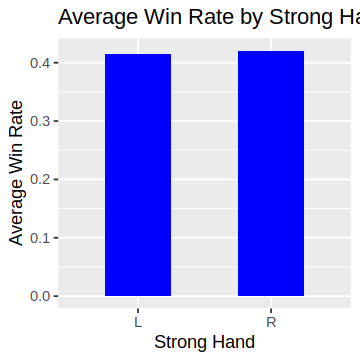

In [11]:
options(repr.plot.width = 3, repr.plot.height = 3)
ggplot(tennis_wanted_stats, aes(x = winner_hand, y = win_rate)) +
  stat_summary(fun = "mean", geom = "bar", fill = "blue",width = 0.5) +
  stat_summary(fun.data = "mean_cl_normal", geom = "errorbar", width = 0.1) +
  labs(title = "Average Win Rate by Strong Hand",
       x = "Strong Hand",
       y = "Average Win Rate")

Prior to the analysis, the seed is set for a consistent, reproducible split. The data is split into a training set and a testing set. 75% of the data set is used in the training set, and the variable we want to predict is set as the `strata` argument.

In [12]:
set.seed(1000)

tennis_split <- initial_split(tennis_wanted_stats, prop = 0.75, strata = win_rate)
tennis_training <- training(tennis_split)
tennis_testing <- testing(tennis_split)

*Fit created on training data*

In [13]:
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

tennis_recipe <- recipe(win_rate ~ age + winner_height + loser_height + first_sv_in + ace,
                        data = tennis_training)
                       

tennis_fit <- workflow() |>
    add_model(lm_spec) |>
    add_recipe(tennis_recipe) |>
    fit(data = tennis_training)

tennis_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
  (Intercept)            age  winner_height   loser_height    first_sv_in  
     0.627216      -0.004995      -0.001147             NA       0.002386  
          ace  
     0.009269  


And then making predictions on the testing set and evaluating model performance.

In [14]:
tennis_predictions <- predict(tennis_fit, new_data = tennis_testing) |>
  bind_cols(tennis_testing)

tennis_predictions

tennis_metrics <- tennis_predictions |>
  metrics(truth = win_rate, estimate = .pred)

tennis_metrics


Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
“prediction from a rank-deficient fit may be misleading”


.pred,age,winner_height,loser_height,first_sv_in,ace,winner_hand,loser_hand,bp_faced,win_rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
NaN,32.46032,NaN,NaN,48.53333,3.800000,R,NA,7.600000,0.2666667
NaN,20.06069,NaN,NaN,35.00000,6.166667,R,NA,4.000000,0.3333333
NaN,21.68413,NaN,NaN,53.10256,14.692308,R,NA,6.897436,0.4871795
0.5005559,21.12724,198,198,51.45729,8.974874,R,NA,5.668342,0.6934673
NaN,19.69655,NaN,NaN,52.91667,8.527778,R,NA,7.611111,0.3611111
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.4367931,31.73491,193,193,50.70149,7.388060,R,NA,6.955224,0.5000000
NaN,26.31672,NaN,NaN,41.36364,7.727273,R,NA,4.727273,0.4545455
NaN,22.99085,NaN,NaN,53.75714,1.671429,L,NA,8.728571,0.4929577


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.16504097
rsq,standard,0.01987259
mae,standard,0.11537441


After obtaining the model metrics with RMSE (Root Mean Squared Error), R-squared (rsq), and MAE (Mean Absolute Error). 
Now, I visualize the model performance and potentially interpret the results. 

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 34 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 34 rows containing missing values (`geom_point()`).”


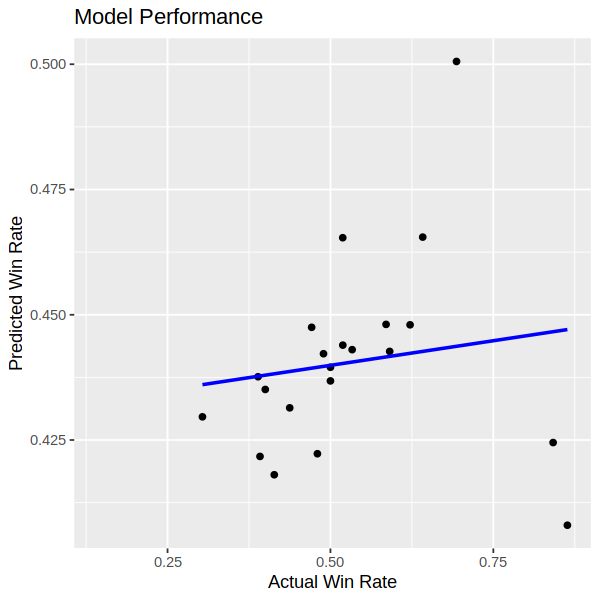

In [15]:
options(repr.plot.width = 5, repr.plot.height = 5)
tennis_performance_plot <- tennis_predictions |>
  ggplot(aes(x = win_rate, y = .pred)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Model Performance",
       x = "Actual Win Rate",
       y = "Predicted Win Rate")

tennis_performance_plot


### Discussion

Scatter Plot Analysis:
Look at the points align with the regression line. 
They deviate from the line, it suggests differences between predicted and actual values.

Regression Line Analysis:
If regression line slopes upward, it means that as the actual win rate increases, 
the model tends to predict higher win rates.
Goodness of Fit: The regression line fits the data normally. 

Residual Analysis:
The spread of residuals is consistent across all levels of the actual win rates.

### References

Sackmann, J. (2023). tennis_atp. GitHub. https://github.com/JeffSackmann/tennis_atp